In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect

C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
path = "sqlite:///Resources/hawaii.sqlite"
engine = create_engine(path)
conn = engine.connect()

In [3]:
inspector = inspect(engine)

tables = inspector.get_table_names()
tables

['measurement', 'station']

In [4]:
for table in tables:
    columns = inspector.get_columns(table)
    print(table)
    print()
    for column in columns:
        print(column["name"], column["type"])
    
    # or put it as a dataframe
    display(pd.DataFrame(columns))
    
    print()

measurement

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,date,TEXT,True,None,auto,0
3,prcp,FLOAT,True,None,auto,0
4,tobs,FLOAT,True,None,auto,0



station

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0
5,elevation,FLOAT,True,None,auto,0


In [5]:
query = """
        SELECT
            *
        FROM
            station
        LIMIT 10;
    """
pd.read_sql(query, conn)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [6]:
query = """
        SELECT
            *
        FROM
            measurement
        LIMIT 10;
    """
pd.read_sql(query, conn)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


# STEP 1

In [7]:
query = """
        SELECT
          max(date)
        FROM
            measurement
        """

engine.execute(query).fetchall()

[('2017-08-23',)]

In [8]:
query = """
        SELECT
          *
        FROM
            measurement
        where
            date >= '2016-08-23'
        LIMIT 10;
        """

engine.execute(query).fetchall()

[(2364, 'USC00519397', '2016-08-23', 0.0, 81.0),
 (2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0)]

In [9]:
query = """
        SELECT
          cast(cast(substr(max(date),1, 4) as integer) - 1 as text) || substr(max(date),5) as max_date
        FROM
            measurement
        """

engine.execute(query).fetchall()

[('2016-08-23',)]

In [10]:
query = """
        SELECT
            date,
            prcp
        FROM
            measurement
        WHERE
            date >= (
                    SELECT
                        cast(cast(substr(max(date),1, 4) as integer) - 1 as text) || substr(max(date),5) as max_date
                    FROM
                        measurement
                )
        ORDER BY
            date;
        """
#lol
df = pd.read_sql(query, conn)
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2230 non-null   object 
 1   prcp    2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.0+ KB


In [12]:
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2230 non-null   datetime64[ns]
 1   prcp    2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.0 KB


C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: Fut

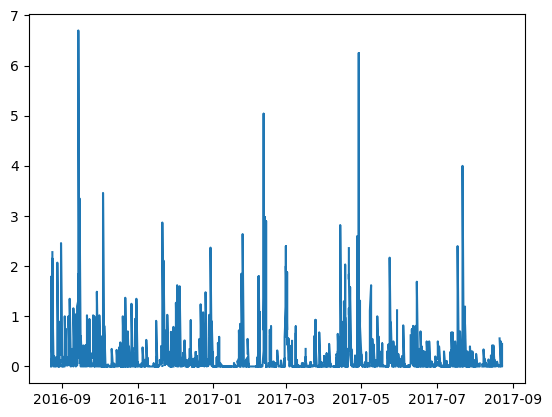

In [13]:
plt.plot(df["date"], df["prcp"])
plt.show()

In [17]:
query = """
        SELECT
            date,
            avg(prcp) as prcp
        FROM
            measurement
        WHERE
            date >= (
                    SELECT
                        cast(cast(substr(max(date),1, 4) as integer) - 1 as text) || substr(max(date),5) as max_date
                    FROM
                        measurement
                )
        GROUP BY
            date
        ORDER BY
            date;
        """
#lol
df = pd.read_sql(query, conn)
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,prcp
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000


C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: Fut

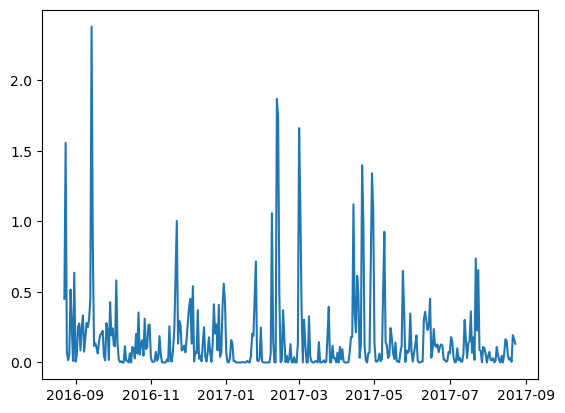

In [18]:
plt.plot(df["date"], df["prcp"])
plt.show()

# PArt 2

In [20]:
query = """
        SELECT
            count(station)
        FROM
            station;
    """
engine.execute(query).fetchall()

[(9,)]

In [21]:
query = """
        SELECT
            s.station,
            s.name,
            count(m.id) as observations
        FROM
            measurement m
            JOIN station s on m.station = s.station
        GROUP BY
            s.station,
            s.name
        ORDER BY
            observations desc;
        """

pd.read_sql(query, conn)

,station,name,observations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [23]:
query = """
        SELECT
            station,
            min(tobs) as min_temp,
            max(tobs) as max_temp,
            avg(tobs) as avg_temp
        FROM
            measurement
        WHERE
            station = 'USC00519281';
        """

pd.read_sql(query, conn)

,station,min_temp,max_temp,avg_temp
0,USC00519281,54.0,85.0,71.663781


In [33]:
# me being crazy
query = """
        SELECT
            station,
            min(tobs) as min_temp,
            max(tobs) as max_temp,
            avg(tobs) as avg_temp
        FROM
            measurement
        WHERE
            station =
                    (SELECT
                        station
                    FROM
                        (SELECT
                            station,
                            max(total_obs)
                        FROM
                            (SELECT
                                station,
                                count(id) as total_obs
                            FROM
                                measurement
                            GROUP BY
                                station
                            ORDER BY
                                total_obs desc
                                ) as x
                        ) y)
        """

pd.read_sql(query, conn)

,station,min_temp,max_temp,avg_temp
0,USC00519281,54.0,85.0,71.663781


In [36]:
query = """
        SELECT
        station,
          date,
          tobs
        FROM
            measurement
        where
            date >= '2016-08-23'
        and station = 'USC00519281'
        order by
            date asc
        """

df2 = pd.read_sql(query, conn)
df2["date"] = pd.to_datetime(df2["date"])
df2.head()

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0


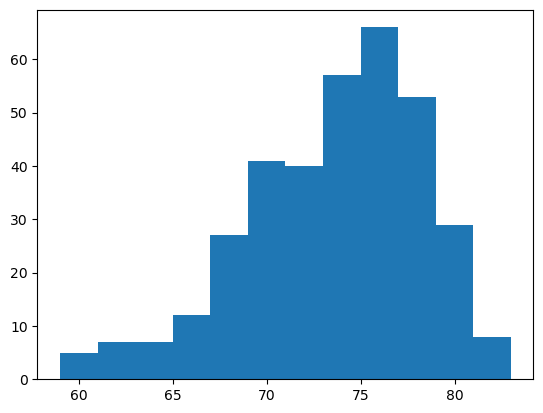

In [38]:
plt.hist(df2.tobs, bins=12)
plt.show()

In [35]:
# DON"T USE THIS _ ME BEING QUIRKY
query = """
        SELECT
        station,
          date,
          tobs
        FROM
            measurement
        where
            date >= (
                    SELECT
                        cast(cast(substr(max(date),1, 4) as integer) - 1 as text) || substr(max(date),5) as max_date
                    FROM
                        measurement
                )
        and station = (SELECT
                        station
                    FROM
                        (SELECT
                            station,
                            max(total_obs)
                        FROM
                            (SELECT
                                station,
                                count(id) as total_obs
                            FROM
                                measurement
                            GROUP BY
                                station
                            ORDER BY
                                total_obs desc
                                ) as x
                        ) y)
        order by
            date asc
        """

df2 = pd.read_sql(query, conn)
df2["date"] = pd.to_datetime(df2["date"])
df2.head()

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0
